<a href="https://colab.research.google.com/github/rjrizani/machine-learning/blob/main/prediksi_sakit_jantung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Data Collection


In [2]:
import pandas as pd
import re

google_drive_link = "https://drive.google.com/file/d/1OkVuzkVDGsgU1CdeRqUYQVaSXQ8BuJpr/view?usp=sharing"

file_id = re.search(r"/d/(\w+)/", google_drive_link).group(1)

url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)

#Data Processing

In [3]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
data['Sex'].value_counts()

,count
Sex,
1,183
0,87


In [6]:
data['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [7]:
data['Chest pain type'].value_counts()

,count
Chest pain type,
4,129
3,79
2,42
1,20


#data formating

In [8]:
#convert the "Heart Disease" column to integer value
data['Heart Disease'] = data['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [9]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# Exploratory Data Analysis(EDA)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

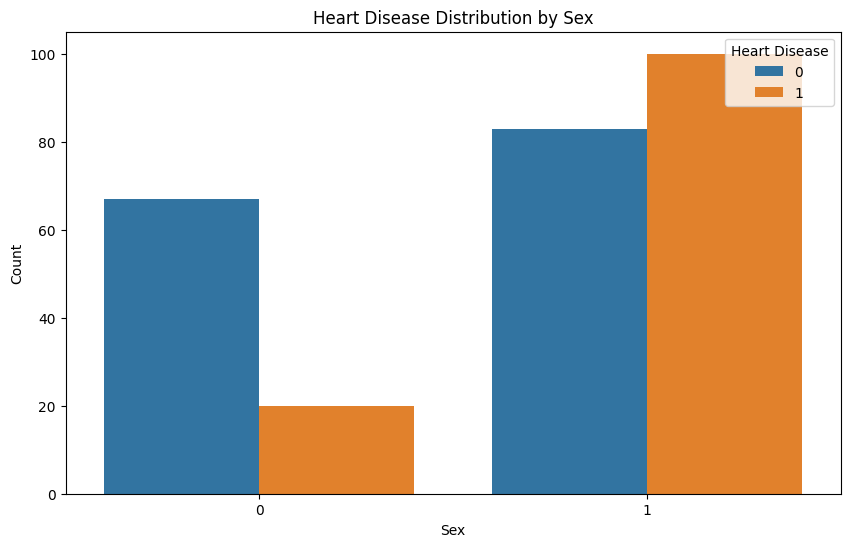

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Heart Disease', data=data)
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

Text(0, 0.5, 'Count')

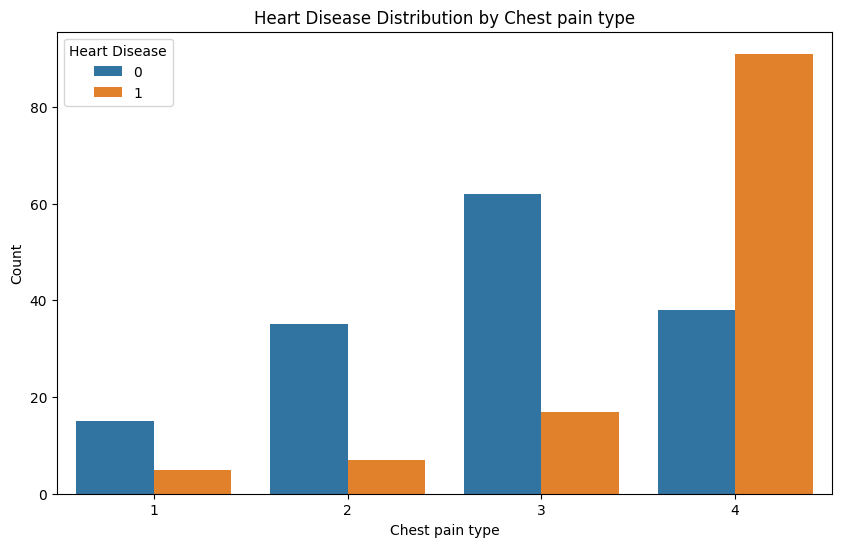

In [13]:
#create a countplot Chest pain type with Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='Chest pain type', hue='Heart Disease', data=data)
plt.title('Heart Disease Distribution by Chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

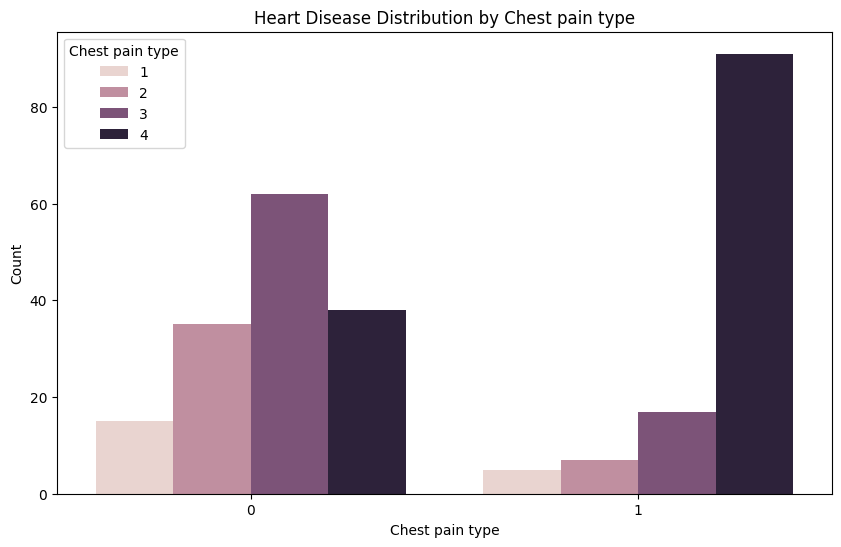

In [16]:
##Distribution of Heart Disease by Chest Pain Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Heart Disease', hue='Chest pain type', data=data)
plt.title('Heart Disease Distribution by Chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

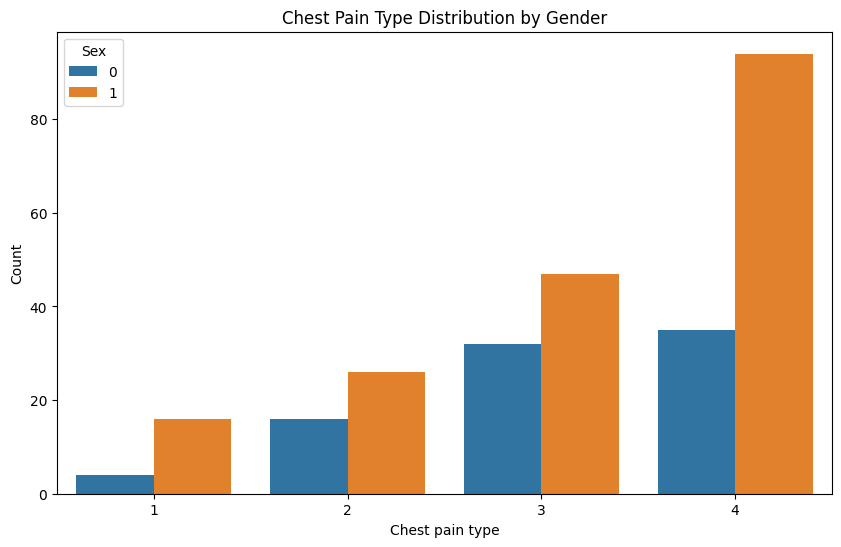

In [17]:
#Distribution Chest Pain Type by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Chest pain type', hue='Sex', data=data)
plt.title('Chest Pain Type Distribution by Gender')
plt.xlabel('Chest pain type')
plt.ylabel('Count')


Text(0, 0.5, 'Sex')

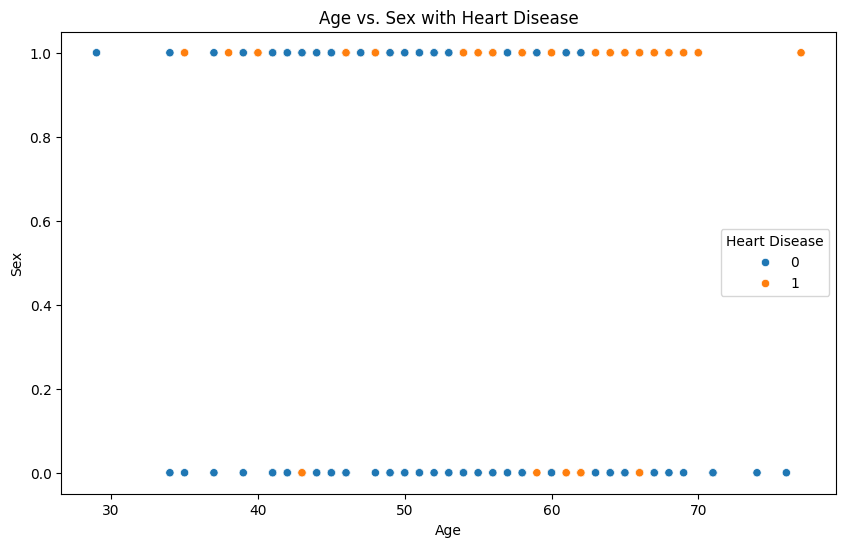

In [18]:
#Age vs. Sex with Heart Disease
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sex', hue='Heart Disease', data=data)
plt.title('Age vs. Sex with Heart Disease')
plt.xlabel('Age')
plt.ylabel('Sex')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

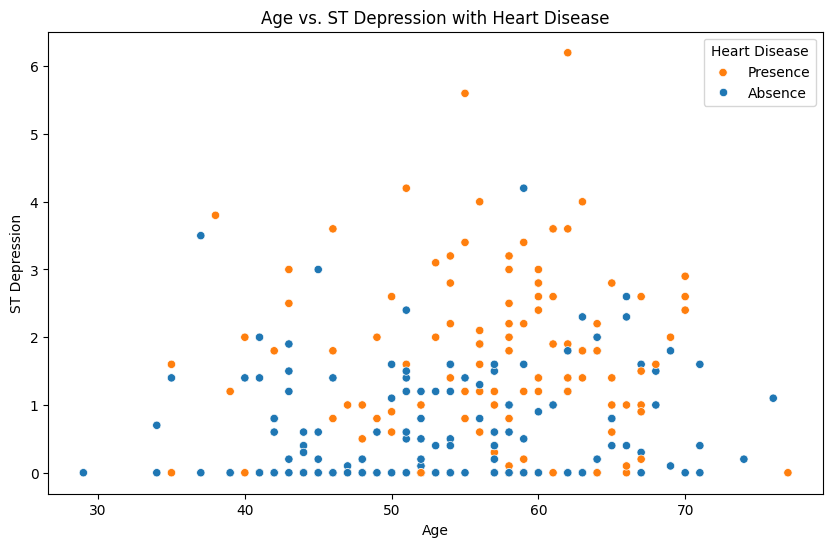

In [26]:
#age vs ST Depression with heart Disease
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='ST depression', hue='Heart Disease', data=data)
plt.title('Age vs. ST Depression with Heart Disease')
plt.xlabel('Age')
plt.ylabel('ST Depression')
plt.legend(title='Heart Disease', loc='upper right', labels=['Presence', 'Absence'])
plt.show()

# New Section